In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/train_loan.csv")

In [ ]:
df= df.drop("Loan_ID",axis=1)

In [ ]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# New Section

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Preprocessing the dataset

In [ ]:
isna =df.isna().sum()
isna

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
cat=df.select_dtypes(include=object).columns
num= df.select_dtypes(include=np.number).columns

In [ ]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
cat_missing = [x for x in cat if isna[x]>0]
cat_missing

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [ ]:
num_m = [x for x in num if isna[x]>0]
num_m

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

treating misssing values

In [ ]:
for x in num_m:
  df[x]=df[x].fillna(df[x].mean( ))

In [ ]:
for c in cat_missing:
  df[c]=df[c].fillna(df[c].mode()[0])

In [ ]:
df.isna().any().sum()

0

# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

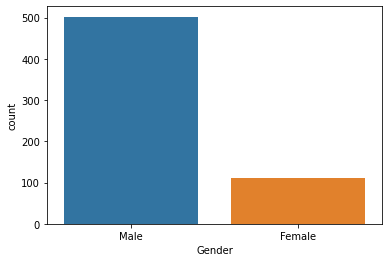

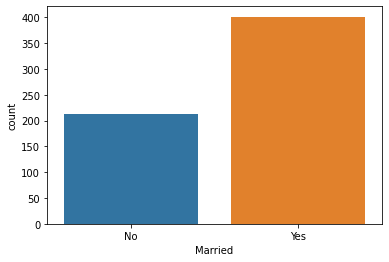

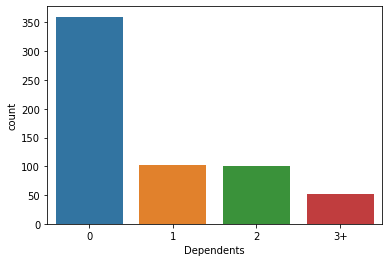

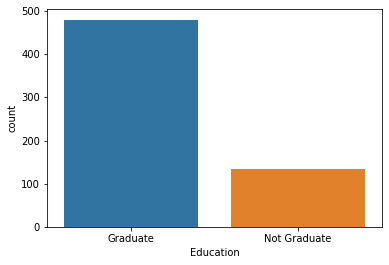

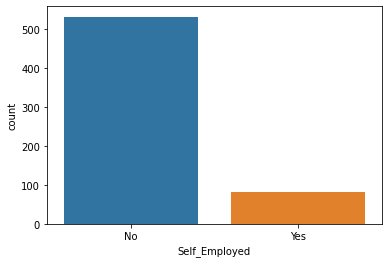

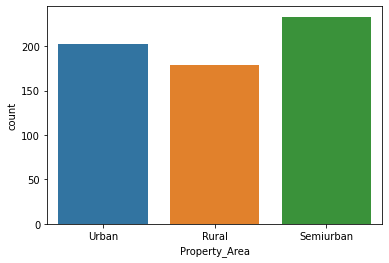

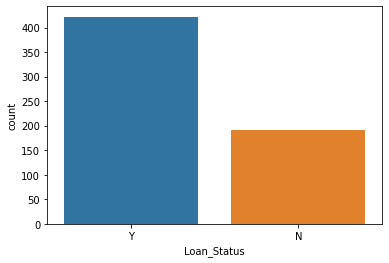

In [ ]:

i=0
for x in cat:
  if x=='Loan_ID':
    continue
  i+=1
  plt.figure()
  sns.countplot(df[x])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

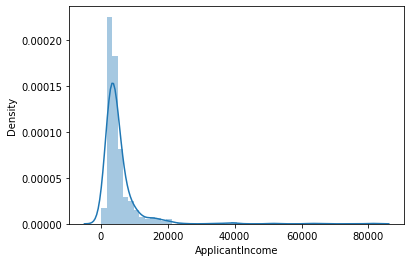

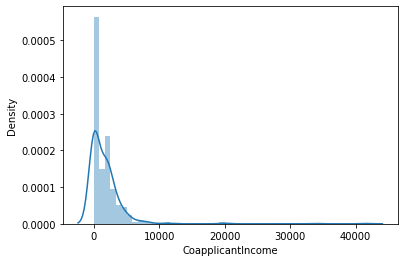

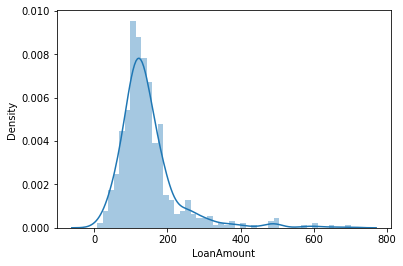

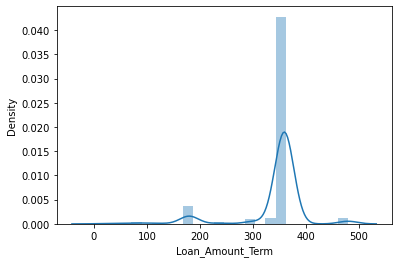

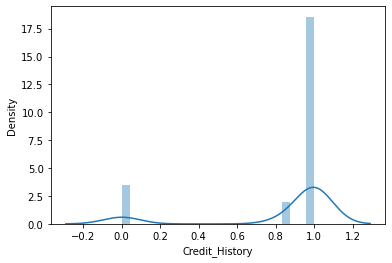

In [ ]:
i=0
for x in num:
  i+=1
  plt.figure()
  sns.distplot(df[x])

# Coorelation Matrix

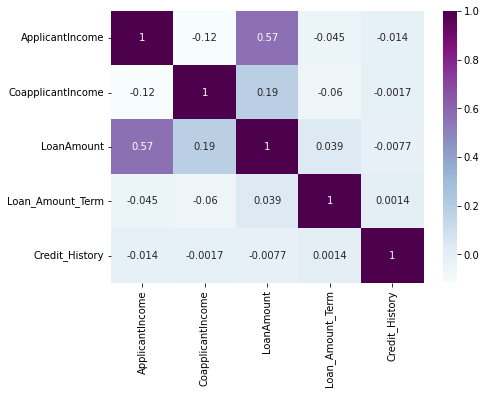

In [ ]:
corr = df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True , cmap = "BuPu")

In [ ]:
y=df['Loan_Status']
x=df.drop('Loan_Status',axis=1)
cat=x.select_dtypes(include=object).columns

# converting categorical variables into numerics

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), cat)], remainder='passthrough')
data = columnTransformer.fit_transform(x)
column_name = columnTransformer.get_feature_names()
data1 =  pd.DataFrame(data, columns= column_name)
data1.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,encoder__x0_Male,encoder__x1_Yes,encoder__x2_1,encoder__x2_2,encoder__x2_3+,encoder__x3_Not Graduate,encoder__x4_Yes,encoder__x5_Semiurban,encoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5849.0,0.0,146.412162,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0


# scaling the data now (for numeric features)

In [ ]:
from sklearn.preprocessing import StandardScaler
sub = data1[num]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(sub), columns=sub.columns)

In [ ]:
data1 =data1.drop(num,axis =1)
data2 =  pd.concat([data1, X], axis=1)
data2.head(3)

,encoder__x0_Male,encoder__x1_Yes,encoder__x2_1,encoder__x2_2,encoder__x2_3+,encoder__x3_Not Graduate,encoder__x4_Yes,encoder__x5_Semiurban,encoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.072991,-0.554487,3.384786e-16,0.279851,0.45164
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.134412,-0.038732,-2.192733e-01,0.279851,0.45164
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.393747,-0.554487,-9.576410e-01,0.279851,0.45164


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.25, random_state=42)

 # Model selection using grid search

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [0.001,0.01,0.1],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
        
            'max_features': ['auto', 'sqrt'],
            
            'n_estimators': [50,60,70,85]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [ 1e-2, 1e-1, 1],
            'solver': [ 'lbfgs', 'liblinear'],
            'penalty':['l1', 'l2', 'elasticnet']
        }
    }
}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
scores = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False,scoring='roc_auc',n_jobs=-1)
    clf.fit(data2, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

,model,best_score,best_params
0,svm,0.768070,"{'C': 0.01, 'kernel': 'rbf'}"
1,random_forest,0.773250,"{'max_features': 'sqrt', 'n_estimators': 50}"
2,logistic_regression,0.757724,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin..."


Based on above, I can conclude that random forest with max_features = 'sqrt' and n_estimators=50 is the best model for solving my problem of loan prediction so far

# Confusion Matrix


A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 1, 99]])

Text(0.5, 15.0, 'Predicted label')

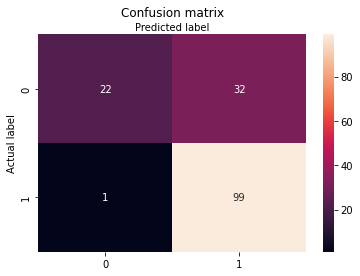

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

wow, that is a huge number of false positive, we don't wanna be in a situation that we accept a home loan for someone who not eligible for it, that's the worst case that we are in now, wow 32 false positive of 131 total positive thats really huge number , we need to fix that immmeadiately.
Not even svm, even logistic regression will give us 30 false positive too.
it's because our unbalanced data


# use stratify while splitting the data

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.25, random_state=42,stratify=y)

Text(0.5, 15.0, 'Predicted label')

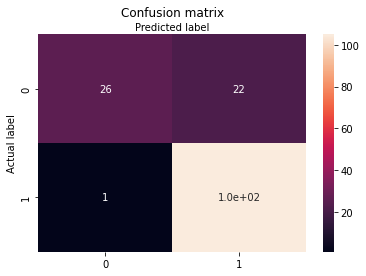

In [ ]:
model = svm.SVC()
model.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

voila ! its better now , we reduced the number if false positive to 22 

i will return to work and pick model using precision metric (to reduce false positive, we will be working on choosing a model based on the higher precision)

In [ ]:
rfc = RandomForestClassifier()

grid_values = {'n_estimators': [40,50,80, 100],
               'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [4,5,6,7,8],
              }

grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = 'accuracy')
grid_search_rfc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [40, 50, 80, 100]},
             scoring='accuracy')

In [ ]:
grid_search_rfc.best_params_


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
pred =grid_search_rfc.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.96      0.54      0.69        48
           Y       0.83      0.99      0.90       106

    accuracy                           0.85       154
   macro avg       0.89      0.77      0.80       154
weighted avg       0.87      0.85      0.84       154



# tuning random forest model , and using with many metrics now

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [40, 50, 80, 100]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [ ]:
grid_search_rfc.best_params_ 


{'max_depth': 4, 'max_features': 0.5, 'n_estimators': 50}

In [ ]:
res =pd.DataFrame.from_dict(grid_search_rfc.cv_results_)
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision', 'split0_test_recall',
       'split1_test_recall', 'split2_test_recall', 'split3_test_recall',
       'split4_test_recall', 'mean_test_recall', 'std_test_recall',
       'rank_test_recall', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1'],
      dtype='object')

I want looking for these results for each metric, so in this case, let say i want look for F1 and precision:

In [ ]:
df = res[['params', 'mean_test_precision', 'rank_test_precision', 'mean_test_f1', 'rank_test_f1']]

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('expand_frame_repr', False)
df

,params,mean_test_precision,rank_test_precision,mean_test_f1,rank_test_f1
0,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.837164,3,0.698625,4
1,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.834872,21,0.693692,45
2,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.837164,3,0.698625,4
3,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",0.837164,3,0.698625,4
4,"{'max_depth': 4, 'max_features': 0.25, 'n_esti...",0.837164,3,0.698625,4
5,"{'max_depth': 4, 'max_features': 0.25, 'n_esti...",0.837164,3,0.698625,4
6,"{'max_depth': 4, 'max_features': 0.25, 'n_esti...",0.837164,3,0.698625,4
7,"{'max_depth': 4, 'max_features': 0.25, 'n_esti...",0.837164,3,0.698625,4
8,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.828553,31,0.696497,25
9,"{'max_depth': 4, 'max_features': 0.5, 'n_estim...",0.838161,2,0.702614,1


In [ ]:
grid_search_rfc.best_score_


0.7026141657479685

that score of course regarding f1 metric

let see now parameters of first ranked based on precision

In [ ]:
df.iloc[46,0]

{'max_depth': 6, 'max_features': 0.25, 'n_estimators': 80}

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth = 6, max_features = 0.25, n_estimators= 80)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=0.25, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [ ]:
pred = rf.predict(x_test)

Text(0.5, 15.0, 'Predicted label')

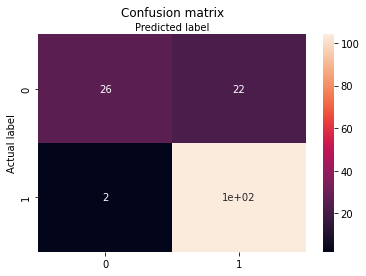

In [ ]:
cm = confusion_matrix(y_test, pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cm, annot=True)
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')